In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **1- Generate Time Series**

In [ ]:
time = np.arange(4 * 365 + 1)
len(time)

1461

In [ ]:
print(time)

[   0    1    2 ... 1458 1459 1460]


In [ ]:
def trend(time, slope=0):
  return time * slope

In [ ]:
baseline = 10
series = baseline + trend(time, slope=0.1)

In [ ]:
print(series)

[ 10.   10.1  10.2 ... 155.8 155.9 156. ]


In [ ]:
def plot_time_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Value')
  if label:
    plt.legen(fontsize=14)
  plt.grid(True)  

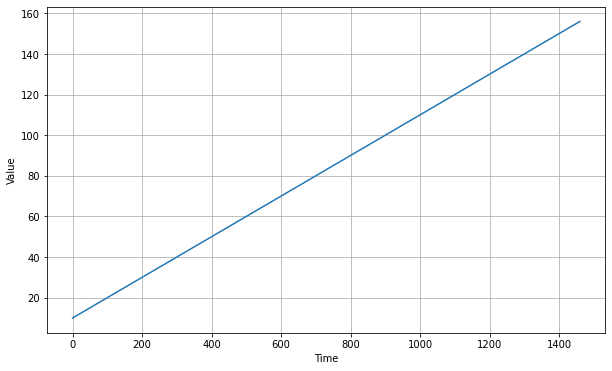

In [ ]:
plt.figure(figsize=(10,6))
plot_time_series(time, series)

# **2- Generate Time Series with Seasonal Pattern**

In [ ]:
season_time = np.where(time < 0.4,
                  np.cos(time * 2 * np.pi),
                  1 / np.exp(3 * time))
print(season_time)

[1.         0.04978707 0.00247875 ... 0.         0.         0.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

In [ ]:
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

In [ ]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

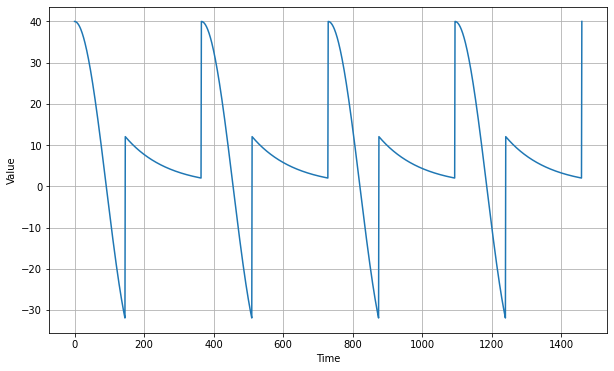

In [ ]:
plt.figure(figsize=(10, 6))
plot_time_series(time, series)
plt.show()

# **3- Create Time Series with Trend & Seasonality**

In [ ]:
slope = 0.5
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

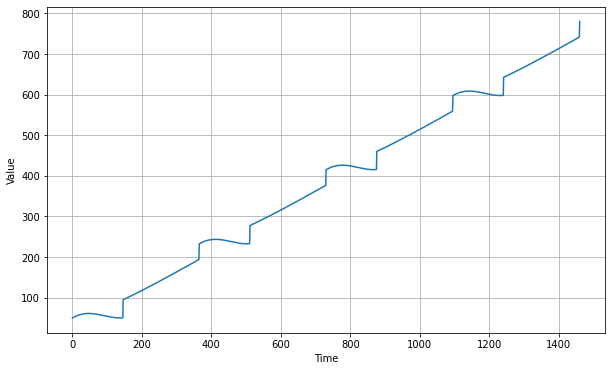

In [ ]:
plt.figure(figsize=(10, 6))
plot_time_series(time, series)
plt.show()

# **4- Adding Noise in Time Series**

In [ ]:
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

In [ ]:
noise_level = 5
noise = white_noise(time, noise_level=noise_level, seed=42)

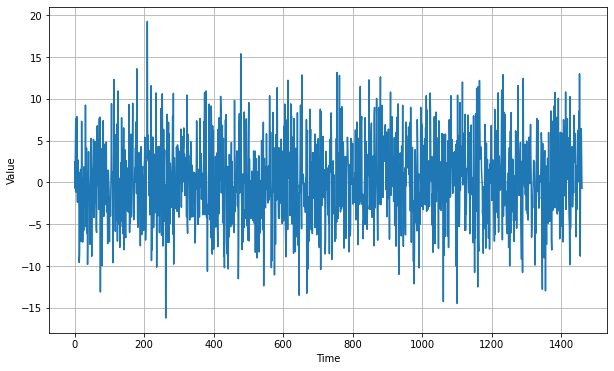

In [ ]:
plt.figure(figsize=(10, 6))
plot_time_series(time, noise)
plt.show()

In [ ]:
series += noise

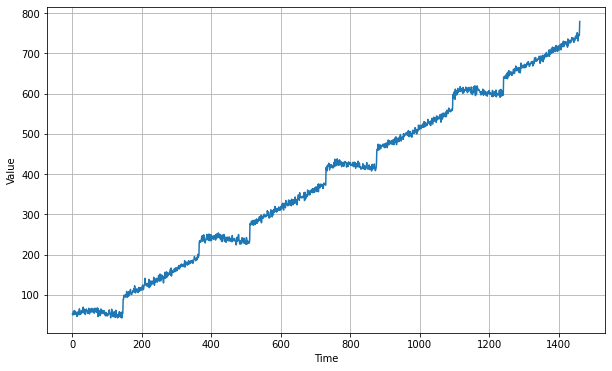

In [ ]:
plt.figure(figsize=(10, 6))
plot_time_series(time, series)
plt.show()